In [97]:
import pickle
import analysis_config
from online_analysis import util_fcns, plot_generated_models
%matplotlib notebook

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-05-20 16:05:02.784310. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [98]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-05-20 16:05:03.234926. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


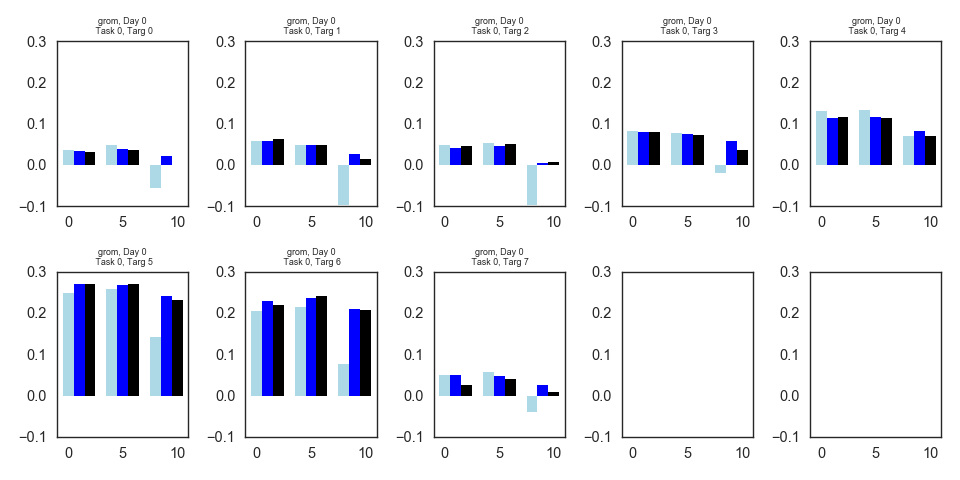

<IPython.core.display.Javascript object>


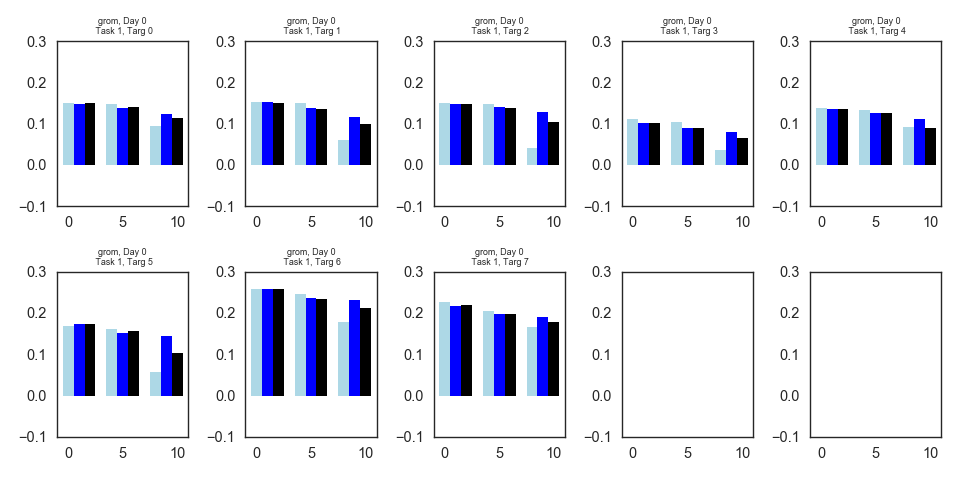

<IPython.core.display.Javascript object>


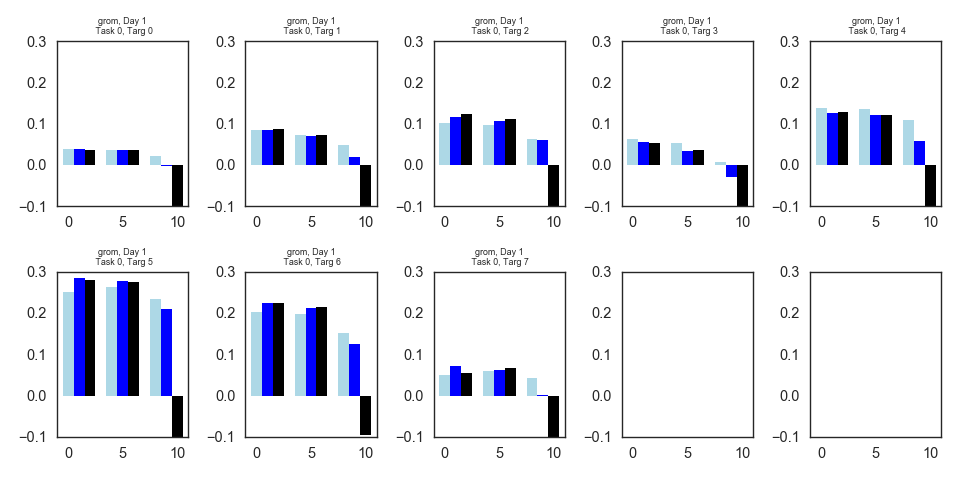

<IPython.core.display.Javascript object>


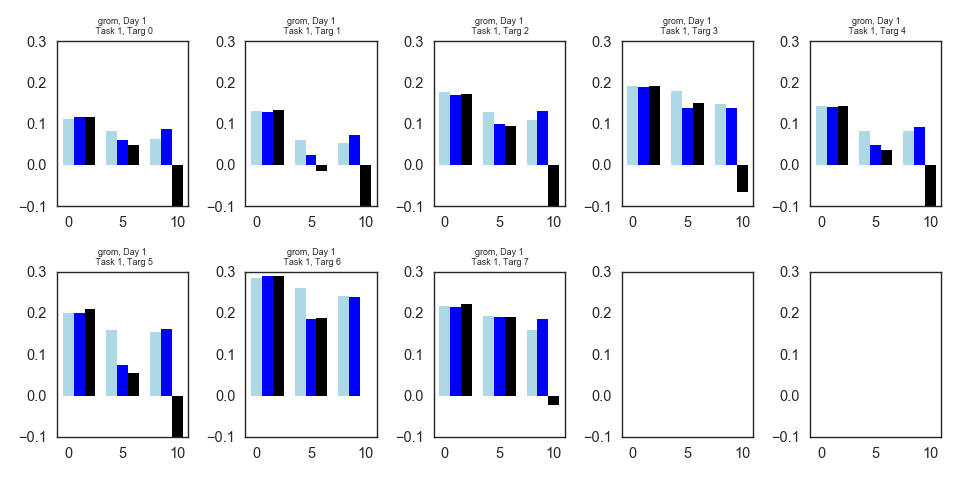

<IPython.core.display.Javascript object>


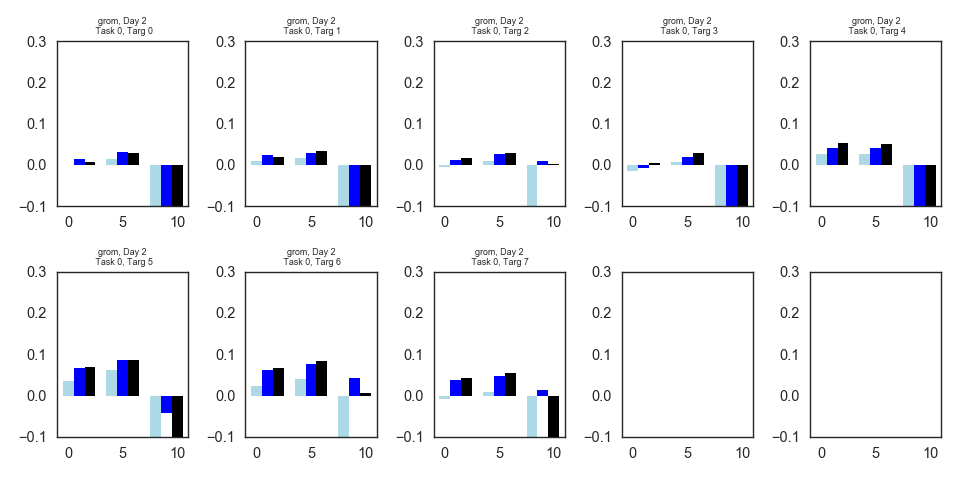

<IPython.core.display.Javascript object>


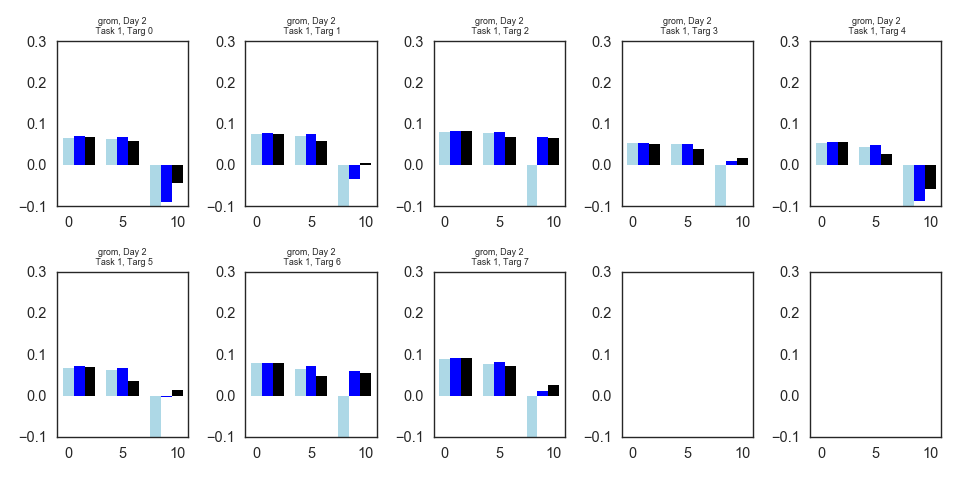

<IPython.core.display.Javascript object>


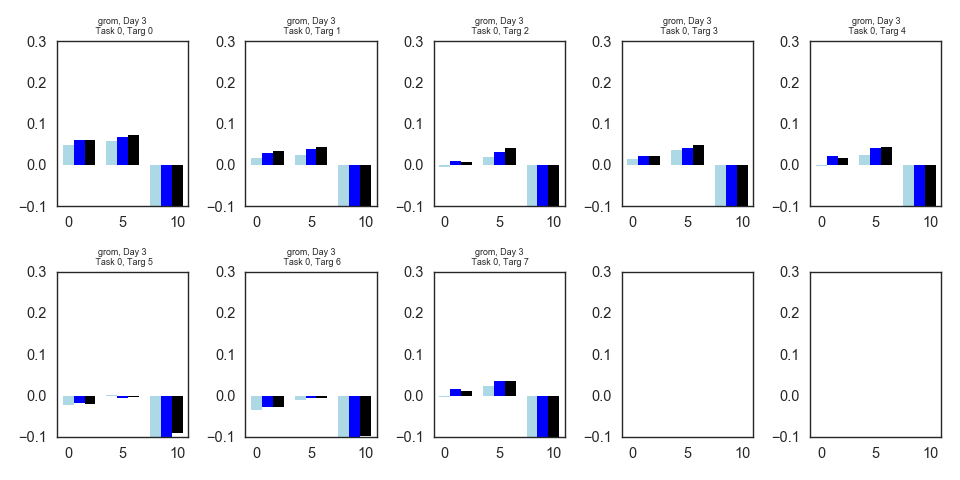

<IPython.core.display.Javascript object>


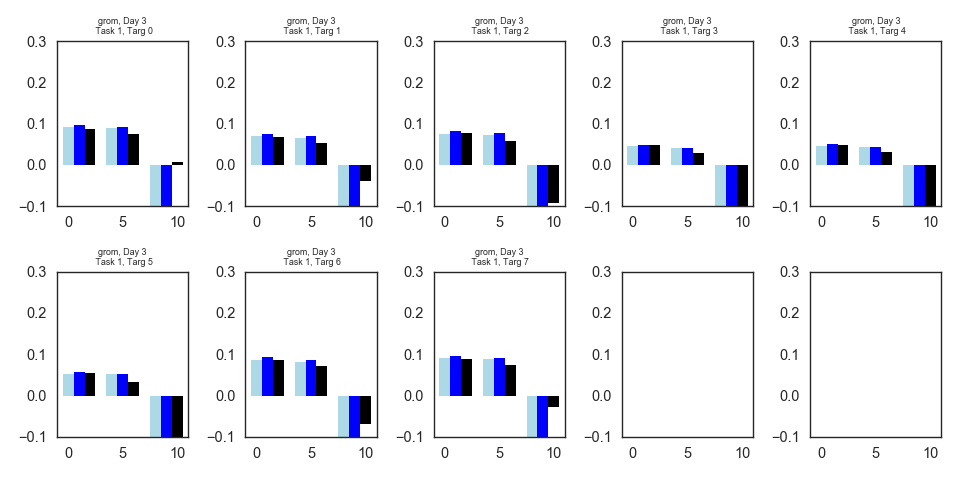

<IPython.core.display.Javascript object>


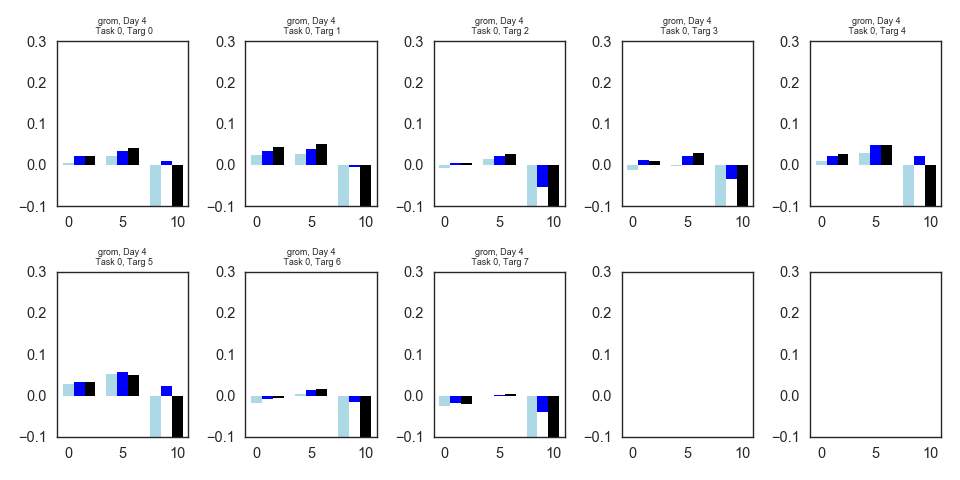

<IPython.core.display.Javascript object>


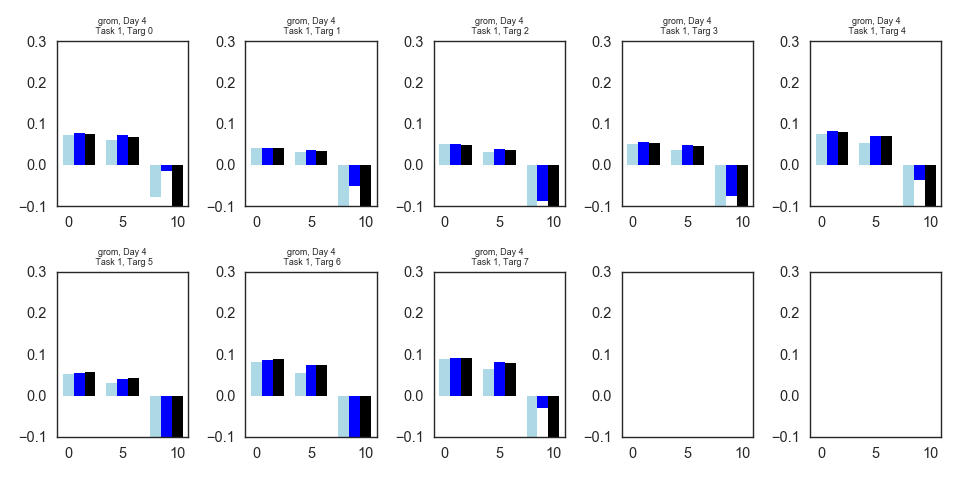

<IPython.core.display.Javascript object>


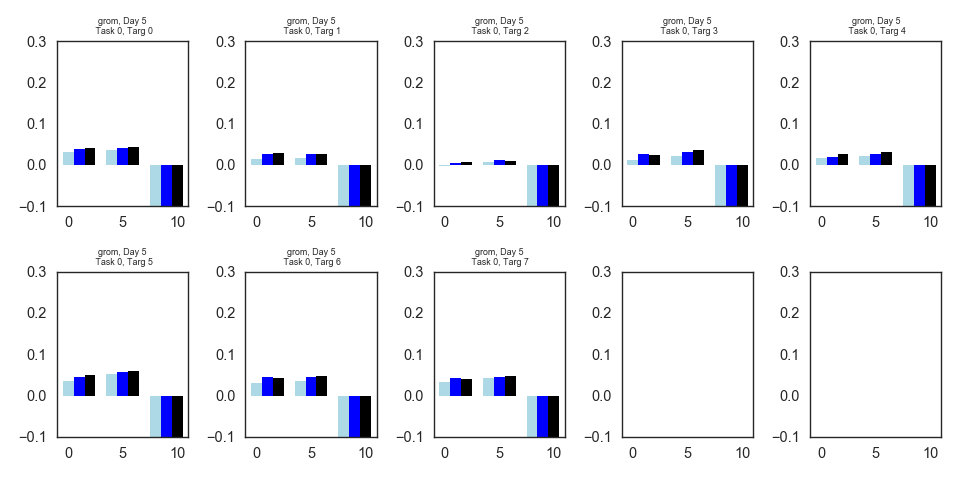

<IPython.core.display.Javascript object>


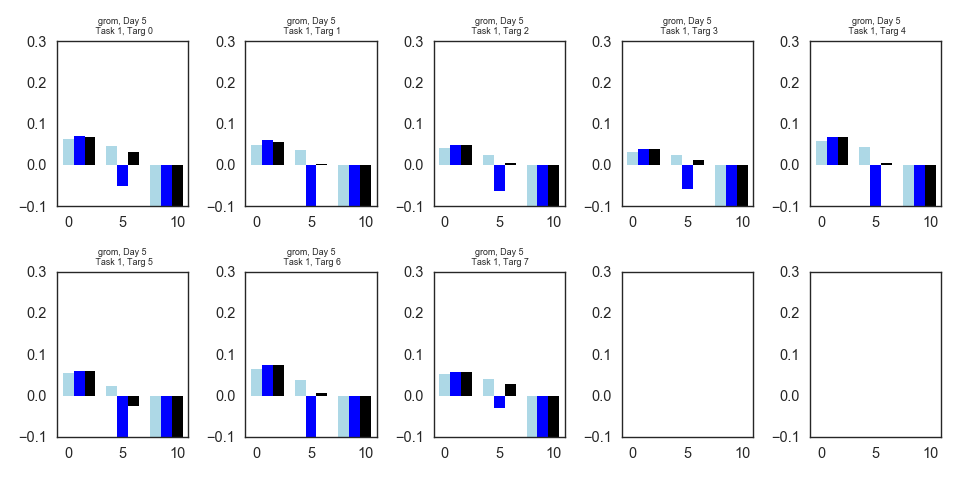

<IPython.core.display.Javascript object>


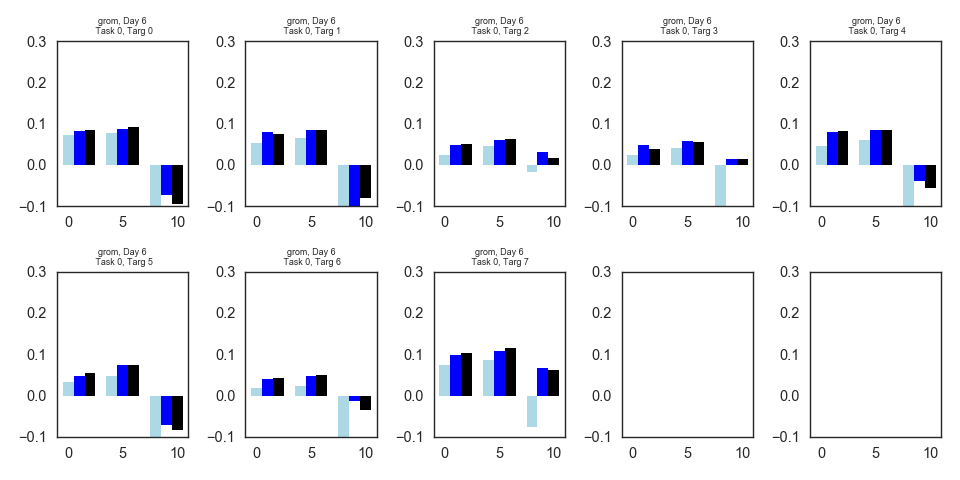

<IPython.core.display.Javascript object>


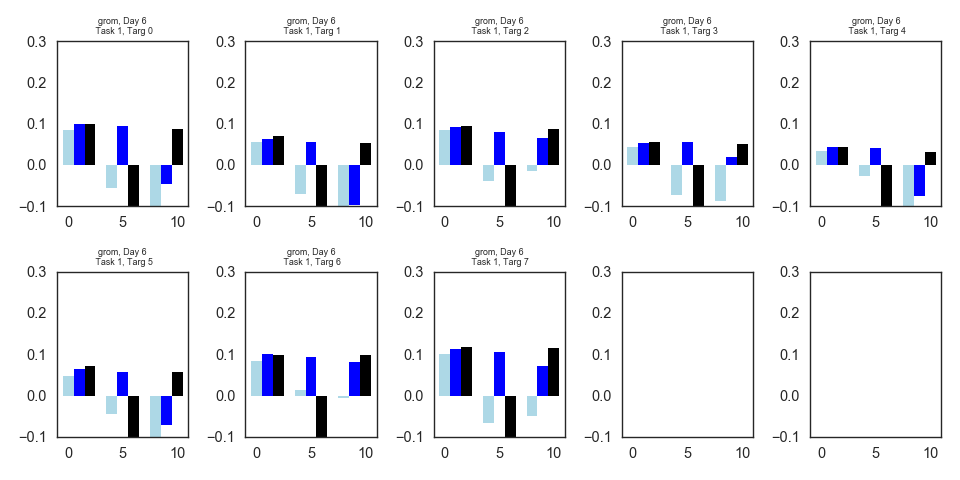

<IPython.core.display.Javascript object>


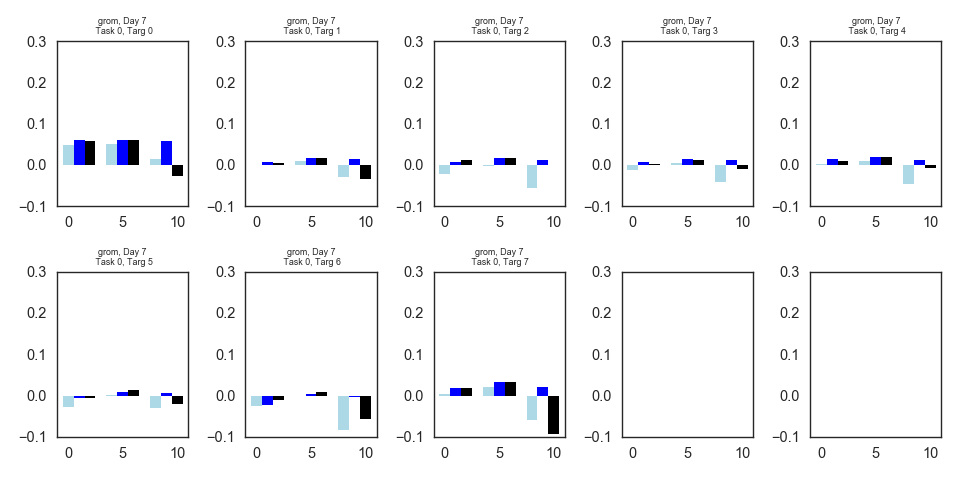

<IPython.core.display.Javascript object>


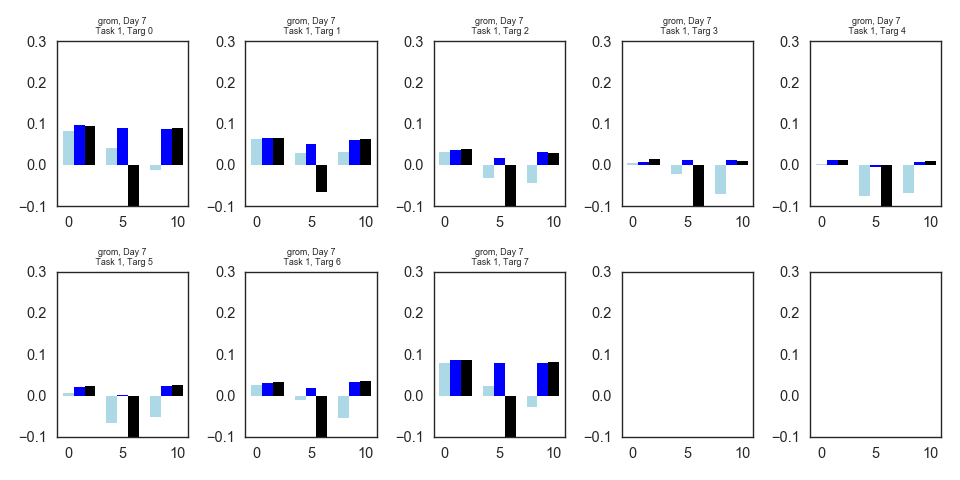

<IPython.core.display.Javascript object>


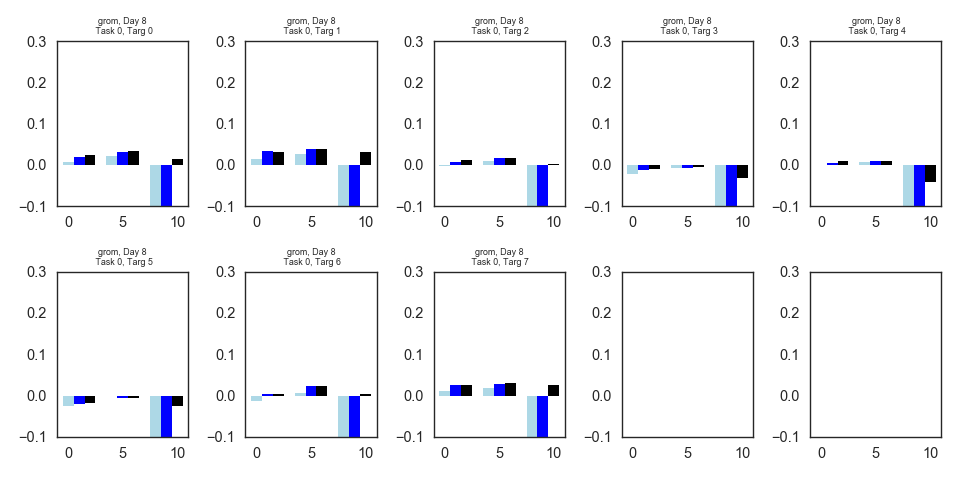

<IPython.core.display.Javascript object>


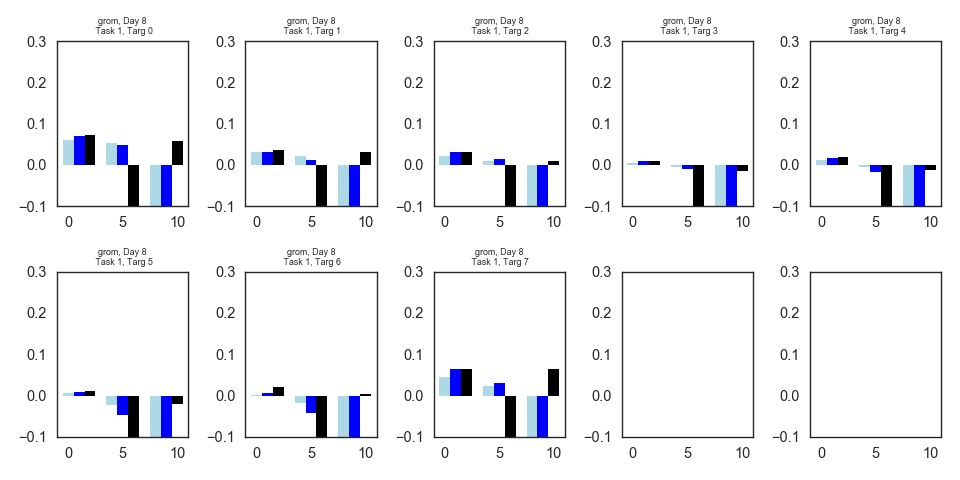

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



<IPython.core.display.Javascript object>


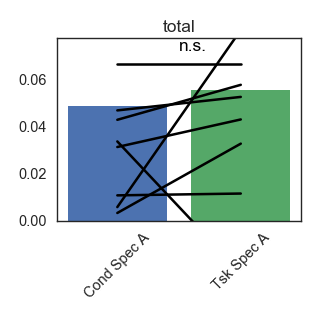

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



<IPython.core.display.Javascript object>


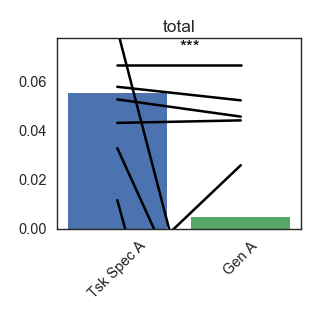

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



<IPython.core.display.Javascript object>


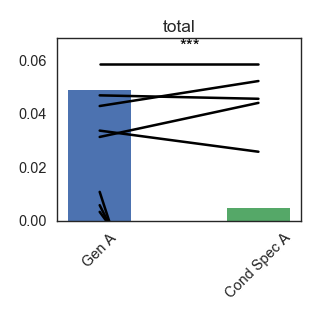

<IPython.core.display.Javascript object>


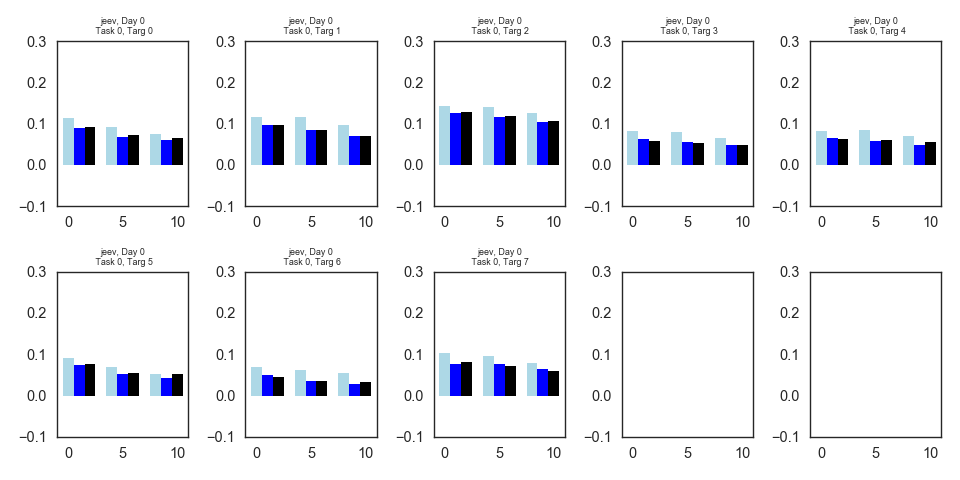

<IPython.core.display.Javascript object>


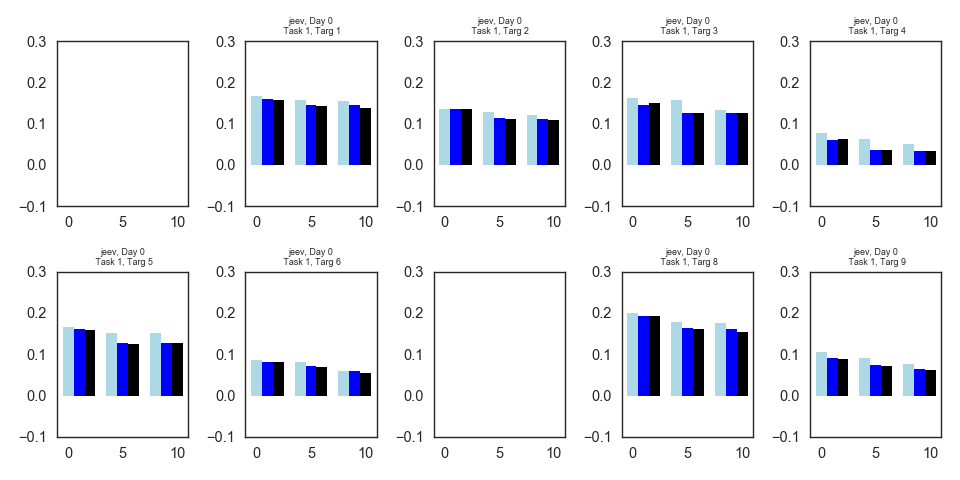

<IPython.core.display.Javascript object>


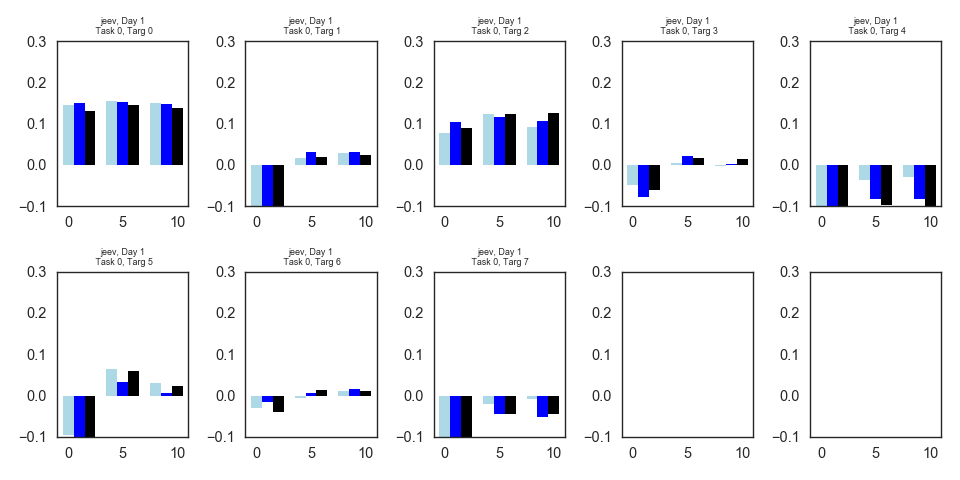

<IPython.core.display.Javascript object>


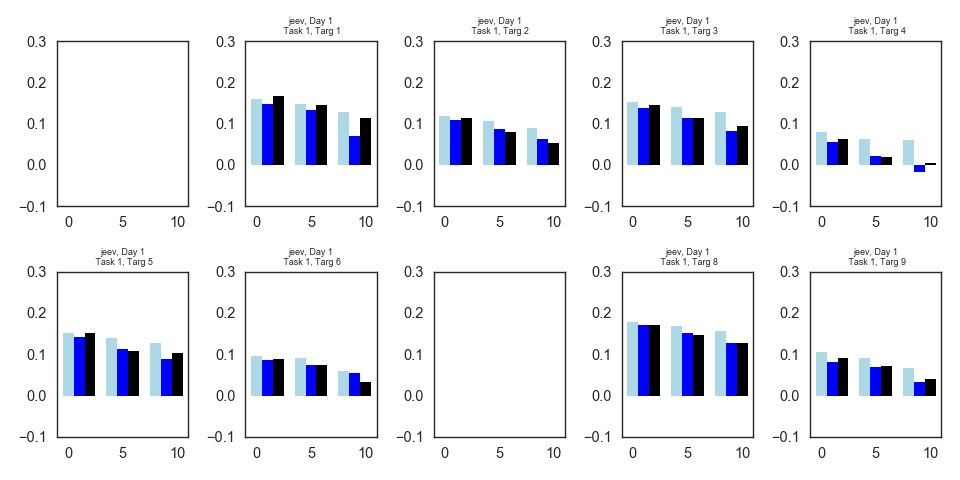

<IPython.core.display.Javascript object>


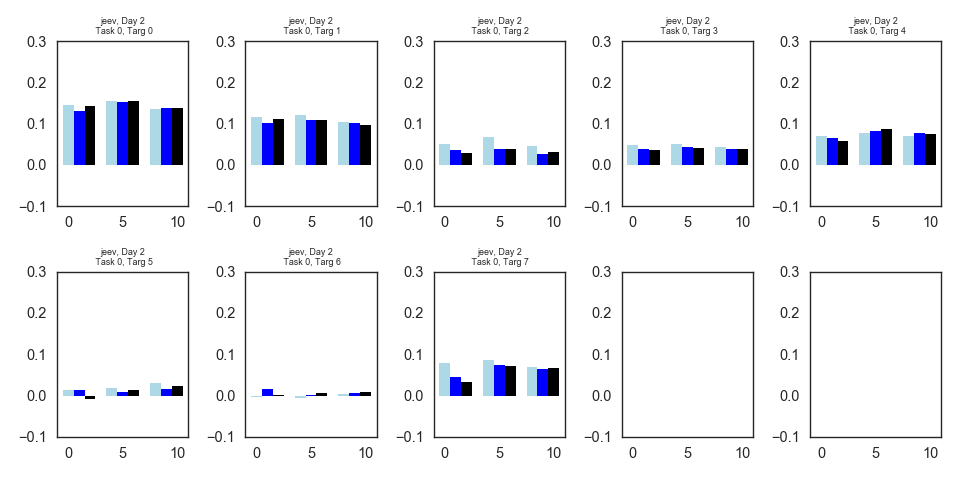

<IPython.core.display.Javascript object>


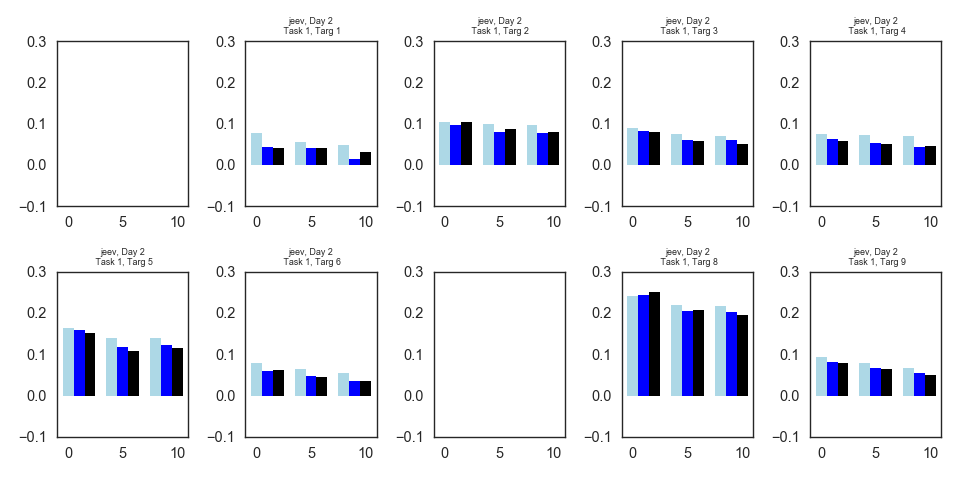

<IPython.core.display.Javascript object>


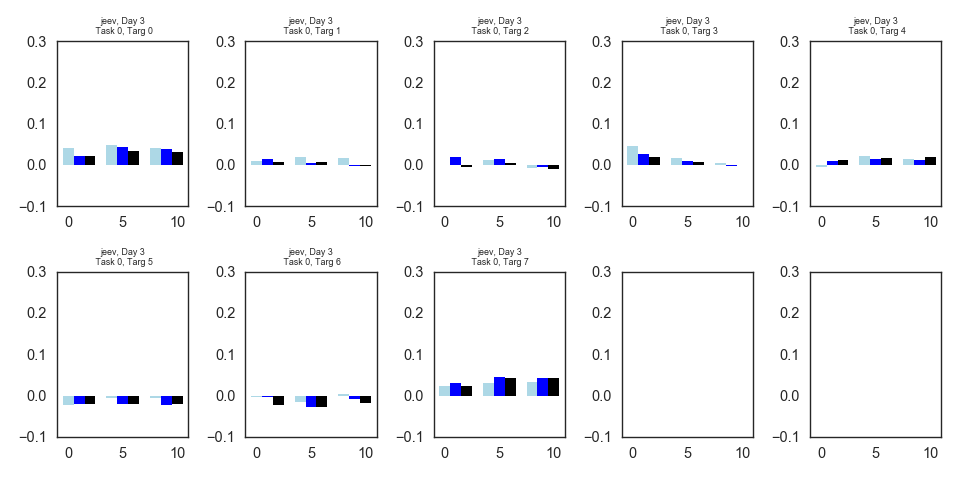

<IPython.core.display.Javascript object>


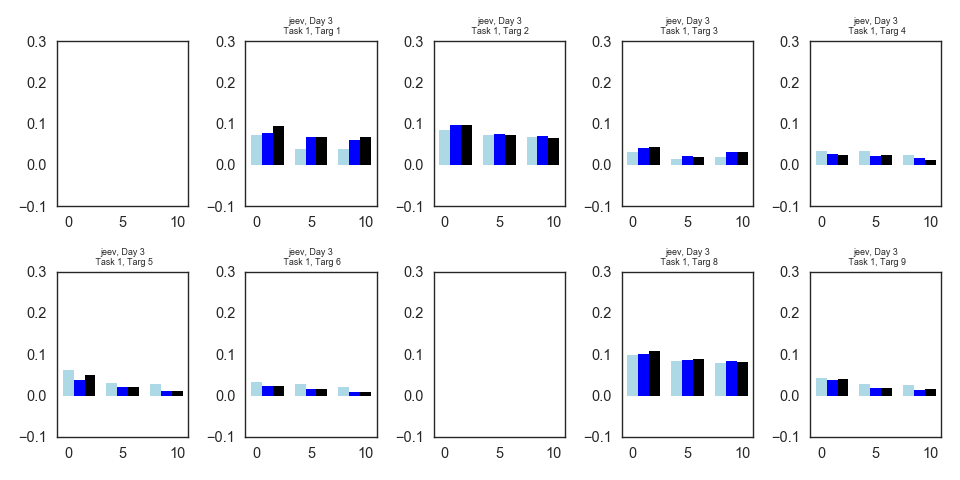

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



<IPython.core.display.Javascript object>


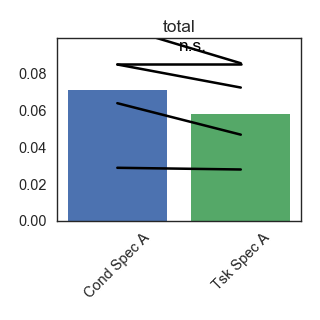

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



<IPython.core.display.Javascript object>


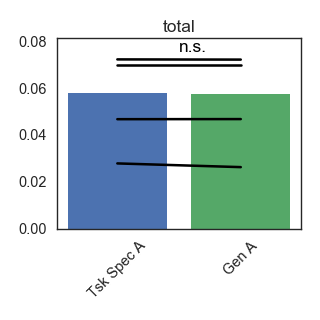

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



<IPython.core.display.Javascript object>


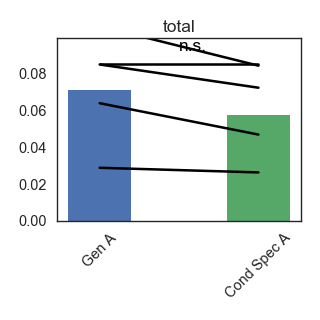

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-05-20 19:42:42.954645. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [111]:
plot_generated_models.plot_r2_bar_state_encoding(res_or_total = 'total')

In [107]:
reload(plot_generated_models)

<module 'online_analysis.plot_generated_models' from 'online_analysis/plot_generated_models.pyc'>

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-05-20 16:59:47.849356. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [79]:
animal = 'jeev'
dat = pickle.load(open(analysis_config.config[animal+'_pref'] + 'res_model_fit_state.pkl', 'rb'))

### Get out pred vs. rez dicts 
pred_dict = dat['pred_dict']
rez_dict = dat['rez_dict']

<IPython.core.display.Javascript object>


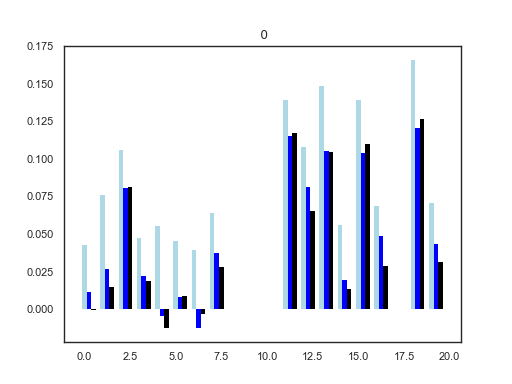

In [83]:
day = 0
confirm_dynamics_plots(0, rez_dict)

In [82]:
def confirm_dynamics_plots(day, rez_dict):
    f, ax = plt.subplots()
    bar_cols = ['lightblue', 'blue', 'k']
    for trg in range(10):
        for task in range(2):
            ix = np.nonzero(np.logical_and(rez_dict[day]['trg'] == trg, rez_dict[day]['tsk'] == task))[0]
            if len(ix) > 0:
                true = rez_dict[day]['true_spks'][ix, :]
                pred_cond = rez_dict[day]['pred_spks_cond'][ix, :]
                pred_tsk = rez_dict[day]['pred_spks_tsk'][ix, :]
                pred_gen = rez_dict[day]['pred_spks_gen'][ix, :]

                for ip, pred in enumerate([pred_cond, pred_tsk, pred_gen]):
                    ax.bar(trg + 10*task + ip*.25, util_fcns.get_R2(true, pred), color=bar_cols[ip],
                          width = .25)
    ax.set_title(" %d" %day)


In [32]:
def plot_Bu(day, pred_dict, rez_dict, targ, task):
    f, ax = plt.subplots()
    ### Get the right data 
    ix = np.nonzero(np.logical_and(rez_dict[day]['trg'] == trg, rez_dict[day]['tsk'] == task))[0]
    colors = ['lightblue', 'blue', 'k']
    
    for ia, A in enumerate(['res_cond', 'res_tsk', 'res_gen']):
        rez_true = rez_dict[day]['res', A[4:]]
        
        for ib, B in enumerate(['Bcond', 'Btsk', 'Bgen']):
            pred = pred_dict[day][A][B]
            
            ax.bar(ia*4 + ib, util_fcns.get_R2(rez_true[ix, :], pred[ix, :]),
                  width = 1., color=colors[ia])

In [88]:
def plot_R2_total_w_Bu(day, pred_dict, rez_dict, targ, task):
    
    ### Get the right data 
    ix = np.nonzero(np.logical_and(rez_dict[day]['trg'] == targ, rez_dict[day]['tsk'] == task))[0]
    colors = ['lightblue', 'blue', 'k']
    if len(ix) > 0:
        ### 
        f, ax = plt.subplots()
        spks_true = rez_dict[day]['true_spks'][ix, :]


        for ia, A in enumerate(['res_cond', 'res_tsk', 'res_gen']):
            spks_pred = rez_dict[day]['pred_spks_'+A[4:]][ix, :]

            for ib, B in enumerate(['Bcond', 'Btsk', 'Bgen']):
                rez_pred = pred_dict[day][A][B][ix, :]

                pred_AB = spks_pred + rez_pred

                ax.bar(ia*4 + ib, util_fcns.get_R2(spks_true, pred_AB),
                      width = 1., color=colors[ia])
                ax.set_title('Day %d, Tsk %d, Targ %d' %(day, task, targ))
                ax.set_ylim([-0, .2])

<IPython.core.display.Javascript object>


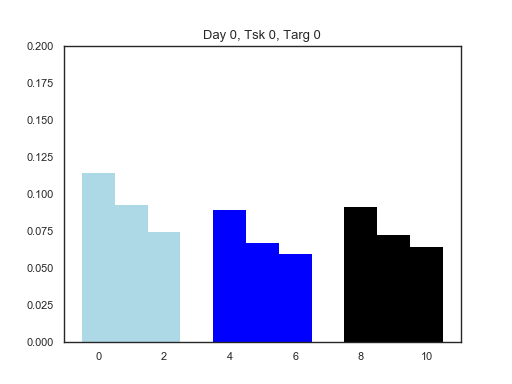

<IPython.core.display.Javascript object>


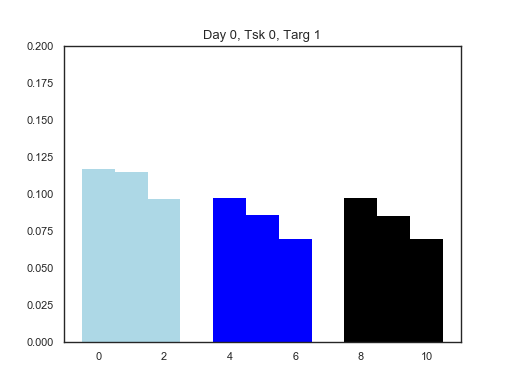

<IPython.core.display.Javascript object>


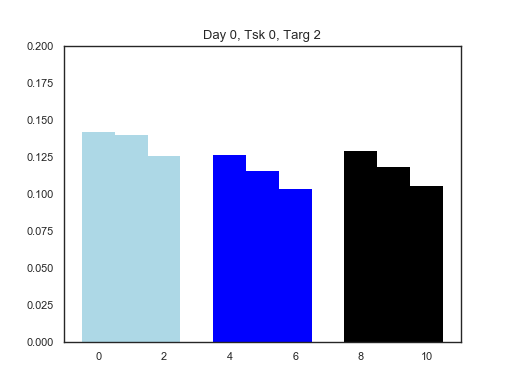

<IPython.core.display.Javascript object>


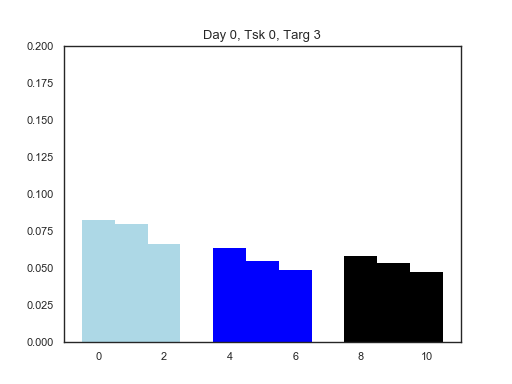

<IPython.core.display.Javascript object>


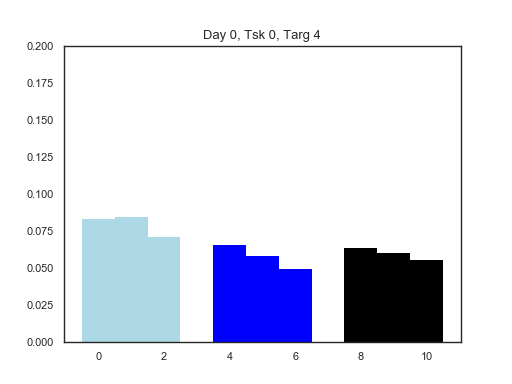

<IPython.core.display.Javascript object>


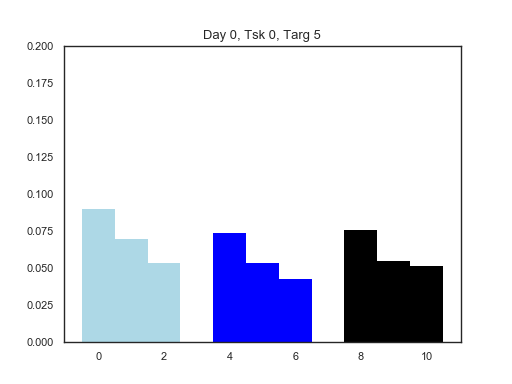

<IPython.core.display.Javascript object>


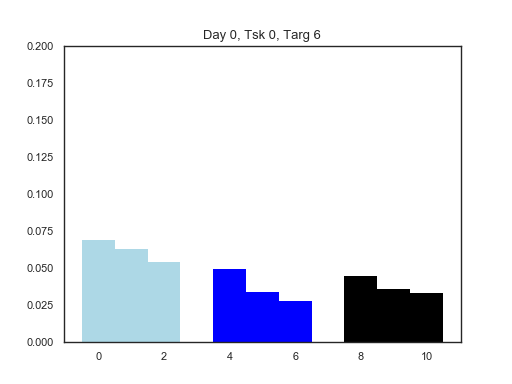

<IPython.core.display.Javascript object>


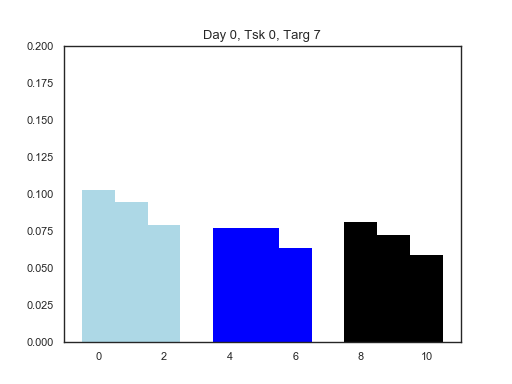

<IPython.core.display.Javascript object>


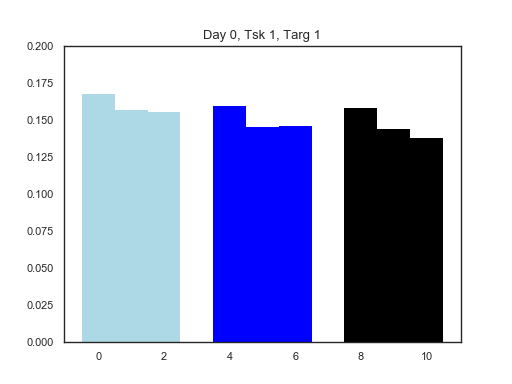

<IPython.core.display.Javascript object>


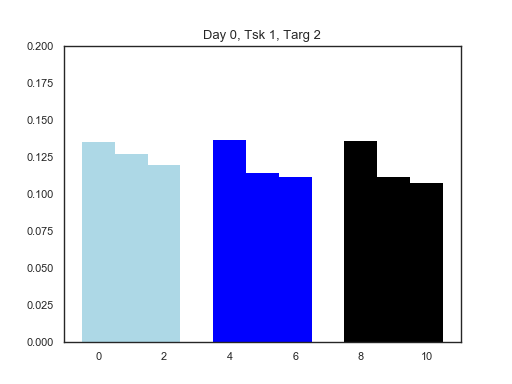

<IPython.core.display.Javascript object>


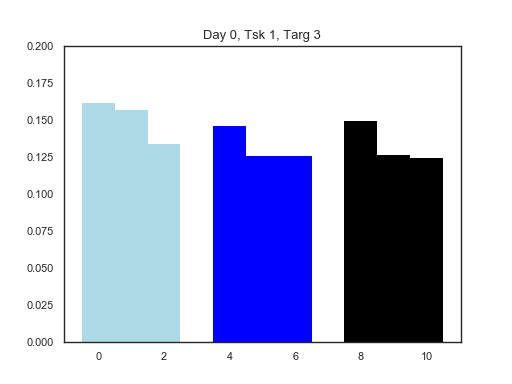

<IPython.core.display.Javascript object>


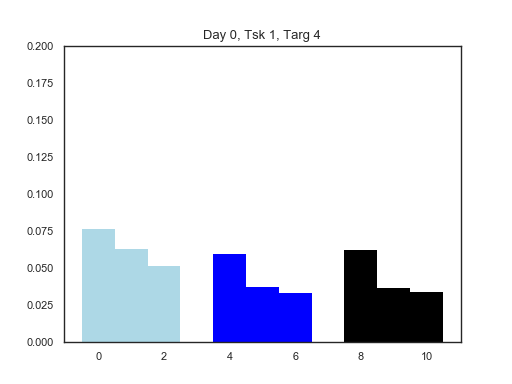

<IPython.core.display.Javascript object>


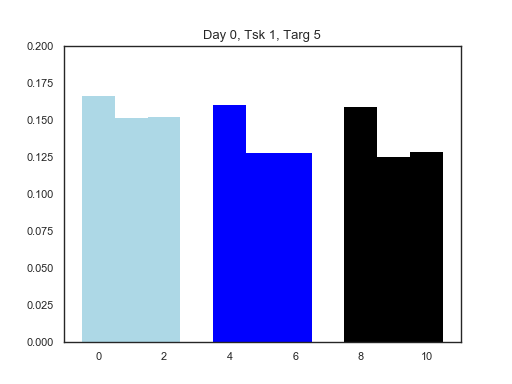

<IPython.core.display.Javascript object>


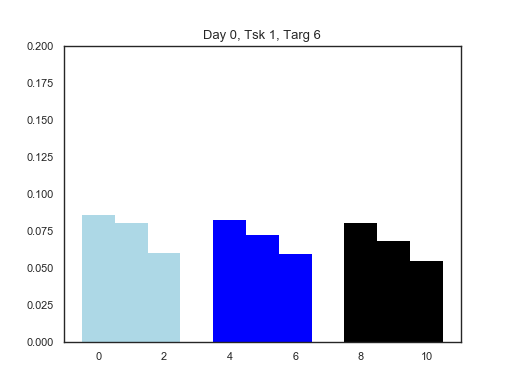

<IPython.core.display.Javascript object>


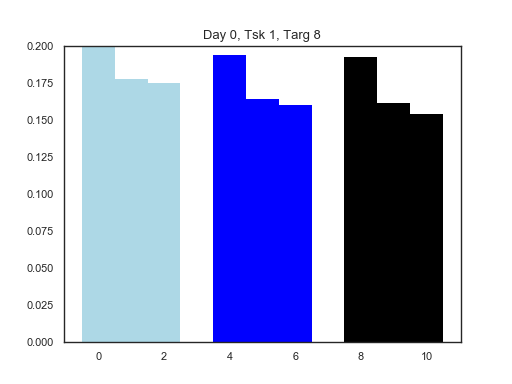

<IPython.core.display.Javascript object>


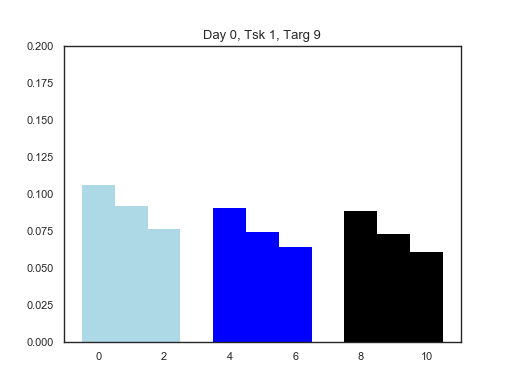

In [89]:
for j in range(2):
    for i in range(10):
        plot_R2_total_w_Bu(0, pred_dict, rez_dict, i, j)